In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [ ]:
df = pd.read_csv('Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
print(df.dtypes)
print('*'*15)
df.iloc[0]

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object
***************


Store                    1
Date            05-02-2010
Weekly_Sales     1643690.9
Holiday_Flag             0
Temperature          42.31
Fuel_Price           2.572
CPI             211.096358
Unemployment         8.106
Name: 0, dtype: object

In [ ]:
# alterando tipo do campo data
df['Date'] = df['Date'].astype(np.datetime64)

print(df.dtypes)
print('*'*15)
df.iloc[0]

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object
***************


Store                             1
Date            2010-05-02 00:00:00
Weekly_Sales              1643690.9
Holiday_Flag                      0
Temperature                   42.31
Fuel_Price                    2.572
CPI                      211.096358
Unemployment                  8.106
Name: 0, dtype: object

In [ ]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
# lojas aparecem na mesma qtdade
tabela = df['Store'].value_counts()
tabela

1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: Store, dtype: int64

In [ ]:
df.loc[df['Weekly_Sales']<=0]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [ ]:
df_holiday = df.loc[df['Holiday_Flag']==True]
df_holiday['Date'].unique() 

array(['2010-12-02T00:00:00.000000000', '2010-10-09T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-11-02T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-10-02T00:00:00.000000000', '2012-07-09T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
df_not_holiday = df.loc[df['Holiday_Flag']==False]
df_not_holiday['Date'].nunique() 

133

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
# Criando 4 novas colunas para categorizar os feriados 

#Labor_Day
df.loc[(df['Date'] == '10-09-2010')|(df['Date'] == '09-09-2011')|(df['Date'] == '07-09-2012'),'Labor_Day'] = True
df.loc[(df['Date'] != '10-09-2010')&(df['Date'] != '09-09-2011')&(df['Date'] != '07-09-2012'),'Labor_Day'] = False

#Super_Bowl
df.loc[(df['Date'] == '12-02-2010')|(df['Date'] == '11-02-2011')|(df['Date'] == '10-02-2012'),'Super_Bowl'] = True
df.loc[(df['Date'] != '12-02-2010')&(df['Date'] != '11-02-2011')&(df['Date'] != '10-02-2012'),'Super_Bowl'] = False

#Thanksgiving
df.loc[(df['Date'] == '26-11-2010')|(df['Date'] == '25-11-2011')|(df['Date'] == '23-11-2012'),'Thanksgiving'] = True
df.loc[(df['Date'] != '26-11-2010')&(df['Date'] != '25-11-2011')&(df['Date'] != '23-11-2012'),'Thanksgiving'] = False


#Christmas
df.loc[(df['Date'] == '31-12-2010')|(df['Date'] == '30-12-2011')|(df['Date'] == '28-12-2012'),'Christmas'] = True
df.loc[(df['Date'] != '31-12-2010')&(df['Date'] != '30-12-2011')&(df['Date'] != '28-12-2012'),'Christmas'] = False


In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Labor_Day,Super_Bowl,Thanksgiving,Christmas
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,False,False,False,False
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,False,True,False,False
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,False,False,False,False
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,False,False,False,False
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,False,False,False,False
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,False,False,False,False
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,False,False,False,False
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,False,False,False,False


In [ ]:
df.groupby('Store').size().reset_index()

,Store,0
0,1,143
1,2,143
2,3,143
3,4,143
4,5,143
5,6,143
6,7,143
7,8,143
8,9,143
9,10,143


In [ ]:
# Criando dataframe com os totais para exibir o volume de vendas em gráfico

# total das vendas em datas comuns
df_notholiday = df[df['Holiday_Flag'] == 0]
total_notholiday = df_notholiday['Weekly_Sales'].sum()

# total das vendas em datas com feriado
df_holiday = df[df['Holiday_Flag'] == 1]
total_holiday = df_holiday['Weekly_Sales'].sum()

# total das vendas no feriado Labor_Day
df_Labor_Day = df[df['Labor_Day'] == True]
total_Labor_Day = df_Labor_Day['Weekly_Sales'].sum()

# total das vendas no feriado Super_Bowl
df_Super_Bowl = df[df['Super_Bowl'] == True]
total_Super_Bowl = df_Super_Bowl['Weekly_Sales'].sum()

# total das vendas no feriado Thanksgiving
df_Thanksgiving = df[df['Thanksgiving'] == True]
total_Thanksgiving = df_Thanksgiving['Weekly_Sales'].sum()

# total das vendas no feriado Christmas
df_Christmas = df[df['Christmas'] == True]
total_Christmas = df_Christmas['Weekly_Sales'].sum()

print(total_Labor_Day,  total_Super_Bowl, total_Thanksgiving, total_Christmas)


data = np.array([['Vendas Holiday', total_holiday], 
                 ['Vendas Not Holiday', total_notholiday],
                 ['LaborDay', total_Labor_Day],
                 ['SuperBowl', total_Super_Bowl],
                 ['Thanksgiving', total_Thanksgiving],
                 ['Christmas', total_Christmas]])
                               
df_vendas_alldate = pd.DataFrame(data, index=range(1,7),columns=['Tipo Data Venda', 'Total'])
df_vendas_alldate

140727684.68 145682278.34 132414608.5 86474980.03999999


,Tipo Data Venda,Total
1,Vendas Holiday,505299551.56
2,Vendas Not Holiday,6231919435.55
3,LaborDay,140727684.68
4,SuperBowl,145682278.34
5,Thanksgiving,132414608.5
6,Christmas,86474980.03999999


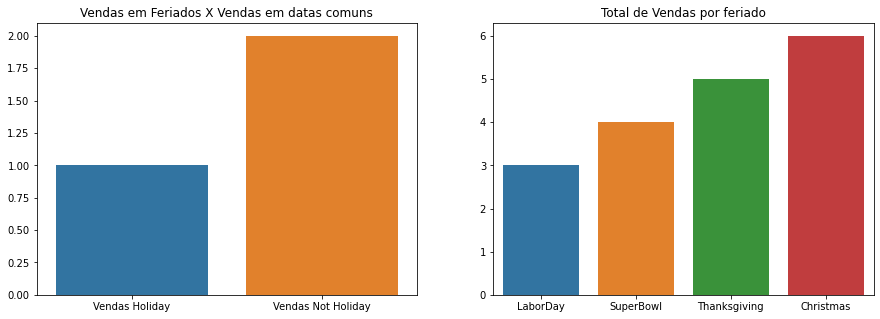

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data = df_vendas_alldate.loc[:2], x = df_vendas_alldate.loc[:2]['Tipo Data Venda'].to_list(), y=df_vendas_alldate.loc[:2].index.to_list())
plt.title('Vendas em Feriados X Vendas em datas comuns')

plt.subplot(1,2,2)
sns.barplot(data = df_vendas_alldate.loc[3:], x = df_vendas_alldate.loc[3:]['Tipo Data Venda'].to_list(), y=df_vendas_alldate.loc[3:].index.to_list())
plt.title('Total de Vendas por feriado')

plt.show()

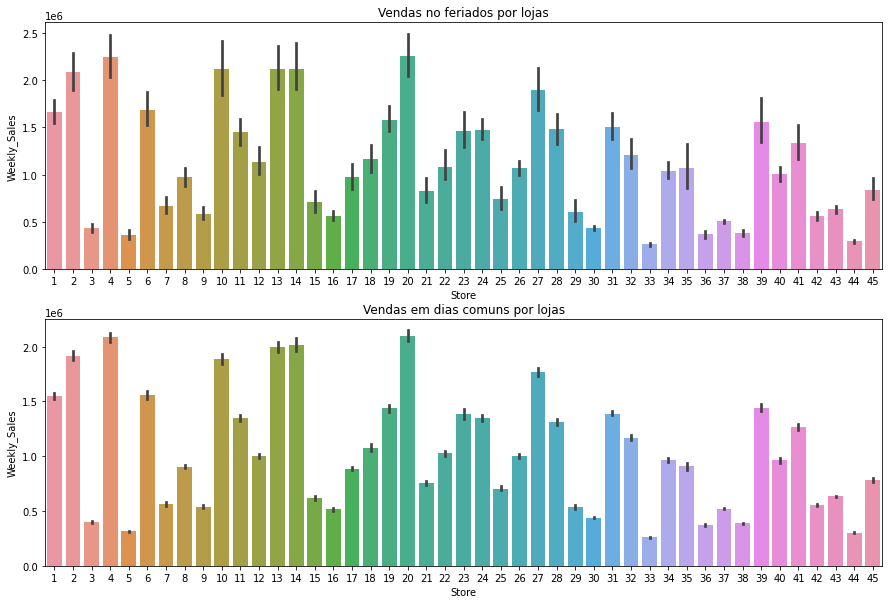

In [ ]:
# Comparando desempenho de vendas por lojas entre Feriados e dias comuns
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.barplot(x='Store', y='Weekly_Sales', data=df_holiday)
plt.title('Vendas no feriados por lojas')

plt.subplot(2,1,2)
sns.barplot(x='Store', y='Weekly_Sales', data=df_notholiday)
plt.title('Vendas em dias comuns por lojas')

plt.show()

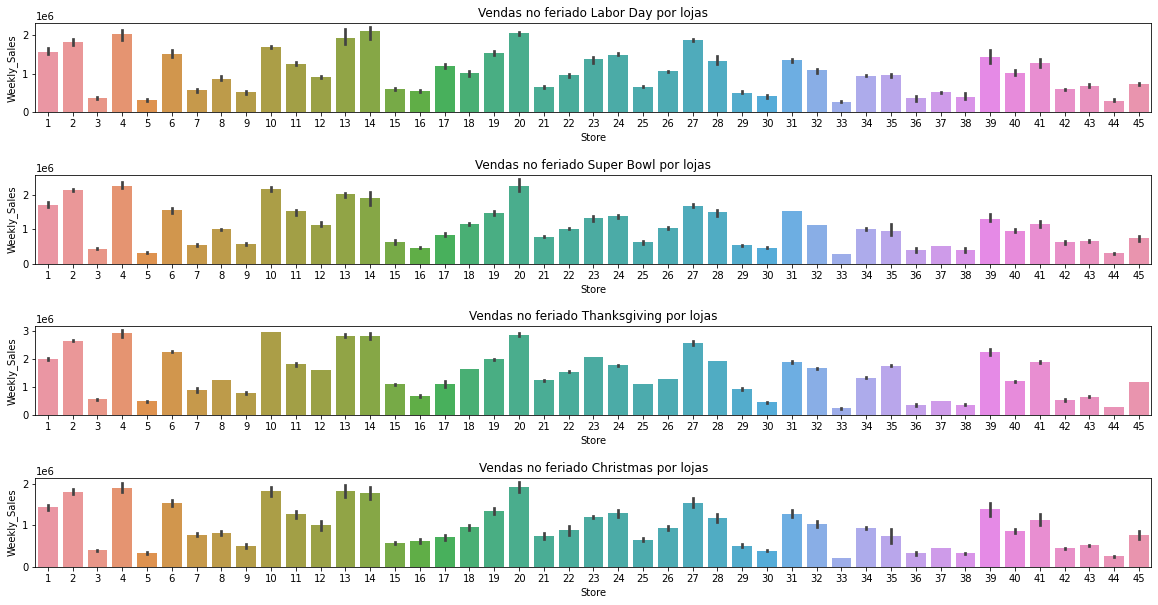

In [ ]:
# Comparando desempenho de vendas por lojas entre os 4 Feriados
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 0.7)
plt.subplot(4,1,1)
sns.barplot(x='Store', y='Weekly_Sales', data=df_Labor_Day)
plt.title('Vendas no feriado Labor Day por lojas')

plt.subplot(4,1,2)
sns.barplot(x='Store', y='Weekly_Sales', data=df_Super_Bowl)
plt.title('Vendas no feriado Super Bowl por lojas')

plt.subplot(4,1,3)
sns.barplot(x='Store', y='Weekly_Sales', data=df_Thanksgiving)
plt.title('Vendas no feriado Thanksgiving por lojas')

plt.subplot(4,1,4)
sns.barplot(x='Store', y='Weekly_Sales', data=df_Christmas)
plt.title('Vendas no feriado Christmas por lojas')

plt.show()

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Labor_Day,Super_Bowl,Thanksgiving,Christmas
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,False,False,False,False
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,False,True,False,False
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,False,False,False,False
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,False,False,False,False
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,False,False,False,False
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,False,False,False,False
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,False,False,False,False
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,False,False,False,False


In [ ]:
# pegando uma amostragem de 5 vendas por loja de vendas no feriado
df_holiday.groupby('Store').apply(lambda x: x.sample(5, random_state = 225 ))

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
Store                                                                    
1     99        1  30-12-2011    1497462.72             1        44.55   
      31        1  10-09-2010    1507460.69             1        78.69   
      105       1  10-02-2012    1802477.43             1        48.02   
      135       1  07-09-2012    1661767.33             1        83.96   
      53        1  11-02-2011    1649614.93             1        36.39   
...           ...         ...           ...           ...          ...   
45    6391     45  30-12-2011     869403.63             1        37.79   
      6323     45  10-09-2010     721460.22             1        70.87   
      6397     45  10-02-2012     803657.12             1        37.00   
      6427     45  07-09-2012     766512.66             1        75.70   
      6345     45  11-02-2011     766456.00             1        30.30   

            Fuel_Price         CPI  Unemployment  
Store                                             
1     99         3.129  219.535990         7.866  
      31         2.565  211.495190         7.787  
      105        3.409  220.265178         7.348  
      135        3.730  222.439015         6.908  
      53         3.022  212.936705         7.742  
...                ...         ...           ...  
45    6391       3.389  189.062016         8.523  
      6323       2.699  182.598178         8.743  
      6397       3.640  189.707605         8.424  
      6427       3.911  191.577676         8.684  
      6345       3.239  183.701613         8.549  

[225 rows x 8 columns]

In [ ]:
# pegando uma amostragem de 5 vendas por loja de vendas em dias comuns
df_notholiday.groupby('Store').apply(lambda x: x.sample(5, random_state = 225 ))

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
Store                                                                    
1     40        1  12-11-2010    1494479.49             0        59.61   
      39        1  05-11-2010    1551659.28             0        58.74   
      45        1  17-12-2010    1891034.93             0        49.84   
      70        1  10-06-2011    1588948.32             0        83.13   
      74        1  08-07-2011    1534849.64             0        85.83   
...           ...         ...           ...           ...          ...   
45    6332     45  12-11-2010     765648.93             0        46.14   
      6331     45  05-11-2010     764014.06             0        45.65   
      6337     45  17-12-2010    1123282.85             0        30.51   
      6362     45  10-06-2011     814395.17             0        73.88   
      6366     45  08-07-2011     768718.11             0        77.49   

            Fuel_Price         CPI  Unemployment  
Store                                             
1     40         2.728  212.003944         7.838  
      39         2.689  211.956394         7.838  
      45         2.869  211.405312         7.838  
      70         3.648  215.043523         7.682  
      74         3.480  215.277175         7.962  
...                ...         ...           ...  
45    6332       2.931  182.991613         8.724  
      6331       2.917  182.946365         8.724  
      6337       3.140  182.517732         8.724  
      6362       3.881  185.648692         8.521  
      6366       3.711  186.032016         8.625  

[225 rows x 8 columns]

In [ ]:
# Pegando o total das vendas e médias do CPI, Fuel_Priece, Unemployment por loja
stores_totais = (df_notholiday.groupby('Store').agg({'Weekly_Sales': 'sum','Temperature':'mean', 'Fuel_Price':'mean', 'CPI':'mean', 'Unemployment':'mean'})).sort_values(by=['Weekly_Sales'],ascending=False).reset_index()
stores_totais

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,20,2.789074e+08,56.242256,3.425707,209.071299,7.371489
1,4,2.771129e+08,63.211353,3.226481,128.694529,5.951714
2,14,2.677941e+08,58.561729,3.425707,186.314614,8.648571
3,13,2.653873e+08,54.503459,3.298180,128.694529,6.995519
4,2,2.545898e+08,69.025263,3.229729,215.680620,7.617120
5,10,2.504802e+08,72.951278,3.587008,128.694529,8.356917
6,27,2.349329e+08,58.030602,3.585669,139.031788,8.001895
7,6,2.069471e+08,70.441654,3.229729,217.587894,6.600421
8,1,2.057453e+08,69.087669,3.229729,216.031272,7.601722
9,39,1.919343e+08,71.283083,3.229729,214.763153,7.861180


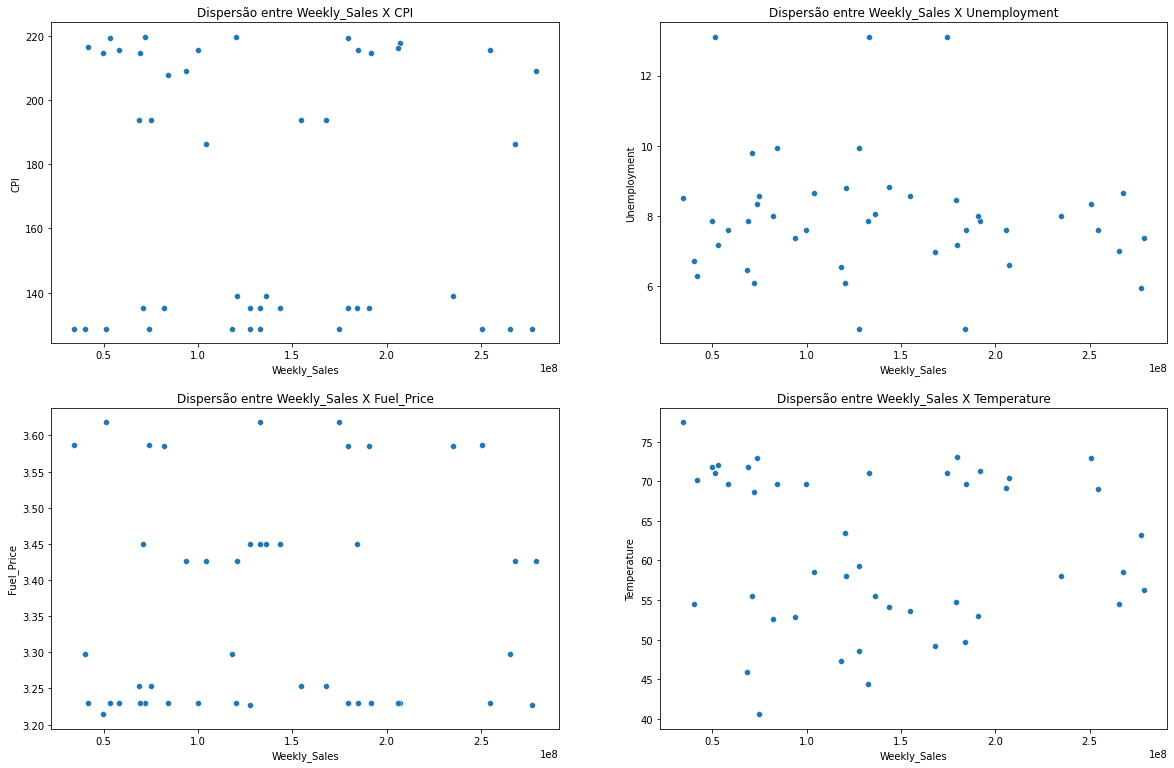

In [ ]:
# É possível perceber através dos gráficos de dispersão que a coluna Weekly_Sales não tem correlação positiva entre as colunas 
# CPI, Unemployment , Fuel_Price e Temperature

plt.figure(figsize=(20,13))
plt.subplots_adjust(hspace = 0.2)
plt.subplot(2,2,1)
sns.scatterplot(data = stores_totais, x = 'Weekly_Sales', y = 'CPI')
plt.title('Dispersão entre Weekly_Sales X CPI')

plt.subplot(2,2,2)
sns.scatterplot(data = stores_totais, x = 'Weekly_Sales', y = 'Unemployment')
plt.title('Dispersão entre Weekly_Sales X Unemployment')

plt.subplot(2,2,3)
sns.scatterplot(data = stores_totais, x = 'Weekly_Sales', y = 'Fuel_Price')
plt.title('Dispersão entre Weekly_Sales X Fuel_Price')

plt.subplot(2,2,4)
sns.scatterplot(data = stores_totais, x = 'Weekly_Sales', y = 'Temperature')
plt.title('Dispersão entre Weekly_Sales X Temperature')


plt.show()

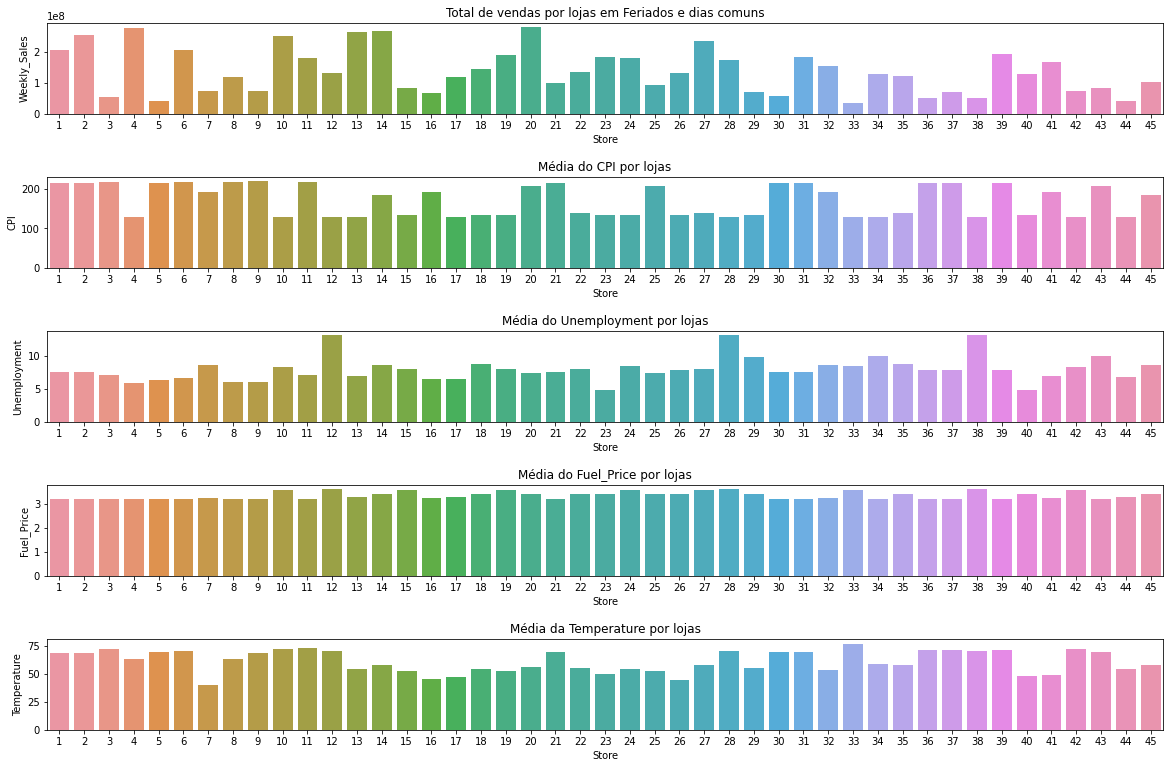

In [ ]:
# Comparando o volume de vendas entre as lojas e buscando um padrão entre as suas colunas : CPI , Unemployment , Fuel_Price e Temperature
plt.figure(figsize=(20,13))
plt.subplots_adjust(hspace = 0.7)
plt.subplot(5,1,1)
sns.barplot(x='Store', y='Weekly_Sales', data=stores_totais)
plt.title('Total de vendas por lojas em Feriados e dias comuns')

plt.subplot(5,1,2)
sns.barplot(x='Store', y='CPI', data=stores_totais)
plt.title('Média do CPI por lojas')

plt.subplot(5,1,3)
sns.barplot(x='Store', y='Unemployment', data=stores_totais)
plt.title('Média do Unemployment por lojas')

plt.subplot(5,1,4)
sns.barplot(x='Store', y='Fuel_Price', data=stores_totais)
plt.title('Média do Fuel_Price por lojas')

plt.subplot(5,1,5)
sns.barplot(x='Store', y='Temperature', data=stores_totais)
plt.title('Média da Temperature por lojas')

plt.show()